<a href="https://colab.research.google.com/github/srujanperam/dl_1/blob/main/notebooks/Tensorboard_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

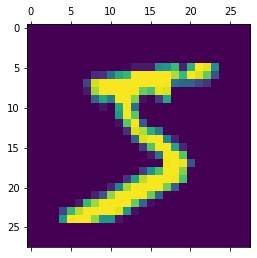

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4508 - accuracy: 0.8701
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1305 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0641 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0491 - accuracy: 0.9857


In [12]:
model.get_weights() 

[array([[ 0.01805273, -0.05661875,  0.07411072, ..., -0.05119574,
          0.0794062 , -0.07445773],
        [ 0.06469814,  0.00991191, -0.08202749, ...,  0.06937601,
         -0.06898837,  0.01817042],
        [ 0.03693796, -0.00657899,  0.04855683, ..., -0.05123691,
          0.05654505, -0.0686969 ],
        ...,
        [ 0.0299973 ,  0.06483123, -0.02529969, ..., -0.0484047 ,
          0.07208276, -0.01590378],
        [-0.04051372, -0.02462807, -0.07728793, ..., -0.07275879,
          0.00403377, -0.00466569],
        [ 0.05213495,  0.05527303, -0.02469347, ...,  0.03468458,
         -0.06148032,  0.01203568]], dtype=float32),
 array([-1.73620023e-02, -1.07955106e-01,  3.52755524e-02,  4.65713441e-02,
        -1.51795194e-01, -7.89800733e-02,  8.85757525e-03,  3.21683697e-02,
         1.95406988e-01,  1.00462668e-01,  9.46148261e-02,  1.23124056e-01,
         1.31431118e-01, -8.95141363e-02,  1.68295860e-01, -2.15107612e-02,
         2.26431788e-04,  2.19007414e-02, -2.02666484e

In [ ]:
#tensorboard --logdir logs/
# %load_ext tensorboard
# %tensorboard --logdir logs/fit